In [1]:
# Environment Setup and Library Imports
import sys
import os
from pathlib import Path

# Configure project root for module imports
project_root = Path(os.getcwd()).parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

plt.style.use('seaborn-v0_8-darkgrid')
print('Environment configured successfully.')

Environment configured successfully.


In [2]:
# Load Sprint Race and Sprint Qualifying Datasets
sprint_path = project_root / 'data' / 'Formula1_2025Season_SprintResults.csv'
sprint_quali_path = project_root / 'data' / 'Formula1_2025Season_SprintQualifyingResults.csv'

df_sprint = pd.read_csv(sprint_path)
df_sprint_quali = pd.read_csv(sprint_quali_path)

# Data cleaning: Handle missing values and type conversions
df_sprint['Points'] = pd.to_numeric(df_sprint['Points'], errors='coerce').fillna(0)
df_sprint['Position'] = pd.to_numeric(df_sprint['Position'], errors='coerce')
df_sprint_quali['Position'] = pd.to_numeric(df_sprint_quali['Position'], errors='coerce')

print(f'Dataset loaded: {len(df_sprint)} sprint results | {len(df_sprint_quali)} sprint qualifying results')

Dataset loaded: 120 sprint results | 120 sprint qualifying results


## 1. Sprint Race Overview
Initial exploration of the 2025 F1 Sprint Race dataset structure and key statistics.

In [ ]:
# Preview Sprint Race Results
print('Sprint Race Results - Sample Data:')
df_sprint.head(10)

Sprint Results:


,Track,Position,No,Driver,Team,Starting Grid,Laps,Time/Retired,Points
0,China,1,44,Lewis Hamilton,Ferrari,1,19,30:39.965,8.0
1,China,2,81,Oscar Piastri,McLaren Mercedes,3,19,+6.889,7.0
2,China,3,1,Max Verstappen,Red Bull Racing Honda RBPT,2,19,+9.804,6.0
3,China,4,63,George Russell,Mercedes,5,19,+11.592,5.0
4,China,5,16,Charles Leclerc,Ferrari,4,19,+12.190,4.0
5,China,6,22,Yuki Tsunoda,Racing Bulls Honda RBPT,8,19,+22.288,3.0
6,China,7,12,Kimi Antonelli,Mercedes,7,19,+23.038,2.0
7,China,8,4,Lando Norris,McLaren Mercedes,6,19,+23.471,1.0
8,China,9,18,Lance Stroll,Aston Martin Aramco Mercedes,10,19,+24.916,0.0
9,China,10,14,Fernando Alonso,Aston Martin Aramco Mercedes,11,19,+38.218,0.0


In [ ]:
# Preview Sprint Qualifying (Sprint Shootout) Results
print('Sprint Qualifying Results - Sample Data:')
df_sprint_quali.head(10)

Sprint Qualifying Results:


,Track,Position,No,Driver,Team,Q1,Q2,Q3,Laps
0,China,1.0,44,Lewis Hamilton,Ferrari,1:31.212,1:31.484,1:30.849,15
1,China,2.0,1,Max Verstappen,Red Bull Racing Honda RBPT,1:31.916,1:31.521,1:30.867,12
2,China,3.0,81,Oscar Piastri,McLaren Mercedes,1:31.723,1:31.362,1:30.929,13
3,China,4.0,16,Charles Leclerc,Ferrari,1:31.518,1:31.561,1:31.057,15
4,China,5.0,63,George Russell,Mercedes,1:31.952,1:31.346,1:31.169,18
5,China,6.0,4,Lando Norris,McLaren Mercedes,1:31.396,1:31.174,1:31.393,13
6,China,7.0,12,Kimi Antonelli,Mercedes,1:31.999,1:31.475,1:31.738,17
7,China,8.0,22,Yuki Tsunoda,Racing Bulls Honda RBPT,1:32.316,1:31.794,1:31.773,12
8,China,9.0,23,Alexander Albon,Williams Mercedes,1:32.462,1:31.539,1:31.852,14
9,China,10.0,18,Lance Stroll,Aston Martin Aramco Mercedes,1:32.327,1:31.742,1:31.982,12


In [ ]:
# Identify Sprint Weekend Circuits
sprint_tracks = df_sprint['Track'].unique()
print(f'2025 Sprint Weekend Circuits ({len(sprint_tracks)} events): {list(sprint_tracks)}')

Sprint Weekends 2025: ['China', 'Miami', 'Belgium', 'United States', 'Brazil', 'Qatar']


## 2. Sprint Race Winners Analysis
Breakdown of sprint race victories and win distribution across drivers.

In [ ]:
# Extract Sprint Race Winners (P1 finishers)
sprint_winners = df_sprint[df_sprint['Position'] == 1][['Track', 'Driver', 'Team', 'Points']]
print('2025 Sprint Race Winners:')
sprint_winners

Sprint Race Winners 2025:


,Track,Driver,Team,Points
0,China,Lewis Hamilton,Ferrari,8.0
20,Miami,Lando Norris,McLaren Mercedes,8.0
40,Belgium,Max Verstappen,Red Bull Racing Honda RBPT,8.0
60,United States,Max Verstappen,Red Bull Racing Honda RBPT,8.0
80,Brazil,Lando Norris,McLaren Mercedes,8.0
100,Qatar,Oscar Piastri,McLaren Mercedes,8.0


In [ ]:
# Visualize Sprint Win Distribution
sprint_win_count = sprint_winners['Driver'].value_counts()

fig = px.pie(values=sprint_win_count.values, names=sprint_win_count.index,
             title='Sprint Race Win Distribution - 2025 Season',
             color_discrete_sequence=px.colors.sequential.Oranges_r)
fig.update_layout(template='plotly_dark')
fig.show()

## 3. Sprint Points Analysis
Comprehensive analysis of sprint points accumulation by drivers and constructors.

In [ ]:
# Driver Sprint Points Championship Standings
sprint_points = df_sprint.groupby('Driver')['Points'].sum().sort_values(ascending=False)

fig = px.bar(sprint_points.reset_index(name='Sprint Points'),
             x='Sprint Points', y='Driver', orientation='h',
             color='Sprint Points', color_continuous_scale='Oranges',
             title='Total Sprint Points per Driver - 2025 Season')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, template='plotly_dark')
fig.show()

In [ ]:
# Constructor Sprint Points Championship Standings
team_sprint_points = df_sprint.groupby('Team')['Points'].sum().sort_values(ascending=False)

fig = px.bar(team_sprint_points.reset_index(name='Sprint Points'),
             x='Team', y='Sprint Points',
             color='Sprint Points', color_continuous_scale='Oranges',
             title='Constructor Sprint Points - 2025 Season')
fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()

## 4. Sprint Qualifying (Sprint Shootout) Analysis
Performance metrics from the Sprint Shootout qualifying sessions.

In [ ]:
# Utility Function: Convert lap time strings to seconds
def time_to_seconds(time_str):
    if pd.isna(time_str) or time_str == '' or time_str == 'No Time':
        return np.nan
    try:
        if ':' in str(time_str):
            parts = str(time_str).split(':')
            return float(parts[0]) * 60 + float(parts[1])
        return float(time_str)
    except:
        return np.nan

# Apply time conversion to Sprint Shootout session columns
for col in ['SQ1', 'SQ2', 'SQ3']:
    if col in df_sprint_quali.columns:
        df_sprint_quali[f'{col}_sec'] = df_sprint_quali[col].apply(time_to_seconds)

print('Sprint Qualifying lap times converted to seconds.')

Sprint Qualifying times converted!


In [ ]:
# Sprint Shootout Pole Position Winners
sq_poles = df_sprint_quali[df_sprint_quali['Position'] == 1][['Track', 'Driver', 'Team']]
print('Sprint Shootout Pole Position Winners:')
sq_poles

Sprint Shootout Pole Positions:


,Track,Driver,Team
0,China,Lewis Hamilton,Ferrari
20,Miami,Kimi Antonelli,Mercedes
40,Belgium,Oscar Piastri,McLaren Mercedes
60,United States,Max Verstappen,Red Bull Racing Honda RBPT
80,Brazil,Lando Norris,McLaren Mercedes
100,Qatar,Oscar Piastri,McLaren Mercedes


In [ ]:
# Average Sprint Qualifying Position by Driver
avg_sq_pos = df_sprint_quali.groupby('Driver')['Position'].mean().sort_values()

fig = px.bar(avg_sq_pos.reset_index(name='Avg SQ Position'),
             x='Avg SQ Position', y='Driver', orientation='h',
             color='Avg SQ Position', color_continuous_scale='RdYlGn_r',
             title='Average Sprint Qualifying Position by Driver')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, template='plotly_dark')
fig.show()

## 5. Sprint Grid to Finish Position Analysis
Evaluating driver performance from grid position to final classification.

In [ ]:
# Merge Sprint Qualifying and Race Data for Position Delta Analysis
df_sprint_merged = df_sprint.merge(
    df_sprint_quali[['Track', 'Driver', 'Position']], 
    on=['Track', 'Driver'], 
    suffixes=('', '_SQ')
)

# Calculate positions gained/lost during sprint race
df_sprint_merged['Positions_Gained'] = df_sprint_merged['Position_SQ'] - df_sprint_merged['Position']

# Identify top overtakers based on average positions gained
sprint_overtakers = df_sprint_merged.groupby('Driver')['Positions_Gained'].mean().sort_values(ascending=False)

fig = px.bar(sprint_overtakers.reset_index(name='Avg Positions Gained'),
             x='Avg Positions Gained', y='Driver', orientation='h',
             color='Avg Positions Gained', color_continuous_scale='RdYlGn',
             title='Average Positions Gained per Sprint Race')
fig.update_layout(yaxis={'categoryorder':'total ascending'}, template='plotly_dark')
fig.add_vline(x=0, line_dash='dash', line_color='white')
fig.show()

## 6. Sprint Performance Heatmap
Visual matrix of sprint finishing positions across all events.

In [ ]:
# Create Sprint Position Heatmap (Driver x Track)
sprint_pivot = df_sprint.pivot(index='Driver', columns='Track', values='Position')

fig = px.imshow(sprint_pivot, 
                color_continuous_scale='RdYlGn_r',
                title='Sprint Race Finishing Positions Matrix',
                labels={'color': 'Position'})
fig.update_layout(template='plotly_dark', height=600)
fig.show()

## 7. Sprint vs Main Race Performance Comparison
Comparative analysis of driver performance between sprint and main races at sprint weekends.

In [ ]:
# Load Main Race Data for Sprint Weekend Comparison
df_race = pd.read_csv('../data/Formula1_2025Season_RaceResults.csv')
df_race['Position'] = pd.to_numeric(df_race['Position'], errors='coerce')

# Filter to sprint weekend events only
df_race_sprint_weekends = df_race[df_race['Track'].isin(sprint_tracks)]

# Calculate average finishing positions
sprint_avg = df_sprint.groupby('Driver')['Position'].mean()
race_avg = df_race_sprint_weekends.groupby('Driver')['Position'].mean()

# Create comparison DataFrame
comparison = pd.DataFrame({
    'Sprint Avg': sprint_avg,
    'Race Avg': race_avg
}).dropna()
comparison['Difference'] = comparison['Sprint Avg'] - comparison['Race Avg']

print('Sprint vs Main Race Average Positions (Sprint Weekends Only):')
comparison.sort_values('Difference')

Sprint vs Main Race Performance (at sprint weekends):


,Sprint Avg,Race Avg,Difference
Driver,,,
Yuki Tsunoda,8.000000,12.166667,-4.166667
Isack Hadjar,10.333333,14.000000,-3.666667
Fernando Alonso,9.250000,12.600000,-3.350000
Lance Stroll,11.000000,14.000000,-3.000000
Pierre Gasly,11.200000,13.600000,-2.400000
Carlos Sainz,9.600000,10.600000,-1.000000
Oscar Piastri,1.750000,2.500000,-0.750000
Esteban Ocon,11.800000,12.333333,-0.533333
Kimi Antonelli,7.833333,8.000000,-0.166667


In [ ]:
# Scatter Plot: Sprint vs Main Race Performance Correlation
fig = px.scatter(comparison.reset_index(), x='Sprint Avg', y='Race Avg',
                 text='Driver', title='Sprint vs Main Race Average Position Correlation')
fig.add_shape(type='line', x0=1, y0=1, x1=20, y1=20,
              line=dict(color='white', dash='dash'))
fig.update_traces(textposition='top center')
fig.update_layout(template='plotly_dark')
fig.show()

## 8. Sprint Podium Statistics
Analysis of podium finishes (P1, P2, P3) in sprint races.

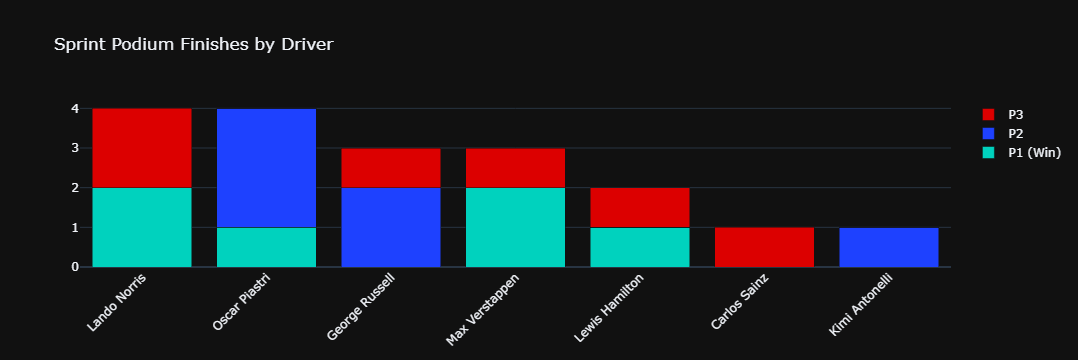

In [16]:
# Calculate Sprint Podium Statistics by Driver
sprint_podiums = df_sprint[df_sprint['Position'] <= 3]
sprint_podium_count = sprint_podiums.groupby(['Driver', 'Position']).size().unstack(fill_value=0)
sprint_podium_count.columns = ['P1', 'P2', 'P3']
sprint_podium_count['Total'] = sprint_podium_count.sum(axis=1)
sprint_podium_count = sprint_podium_count.sort_values('Total', ascending=False)

# Stacked Bar Chart: Podium Distribution

fig = go.Figure()
fig.add_trace(go.Bar(name='P1 (Win)', x=sprint_podium_count.index, y=sprint_podium_count['P1'], marker_color='#00D2BE'))
fig.add_trace(go.Bar(name='P2', x=sprint_podium_count.index, y=sprint_podium_count['P2'], marker_color='#1E41FF'))
fig.add_trace(go.Bar(name='P3', x=sprint_podium_count.index, y=sprint_podium_count['P3'], marker_color='#DC0000'))

fig.update_layout(barmode='stack', title='Sprint Podium Finishes by Driver',
                  template='plotly_dark', xaxis_tickangle=-45)
fig.show()


## 9. Constructor Sprint Performance Analysis
Team-level sprint race performance metrics and comparisons.

In [ ]:
# Average Sprint Race Finishing Position by Constructor
team_sprint_avg = df_sprint.groupby('Team')['Position'].mean().sort_values()

fig = px.bar(team_sprint_avg.reset_index(name='Avg Sprint Position'),
             x='Team', y='Avg Sprint Position',
             color='Avg Sprint Position', color_continuous_scale='RdYlGn_r',
             title='Average Sprint Race Position by Constructor')
fig.update_layout(template='plotly_dark', xaxis_tickangle=-45)
fig.show()

In [ ]:
# Sprint Points Contribution to Overall Championship
sprint_contribution = df_sprint.groupby('Driver')['Points'].sum()
race_points_sprint_weekends = df_race_sprint_weekends.groupby('Driver')['Points'].sum()

# Calculate sprint vs race points breakdown
contribution_df = pd.DataFrame({
    'Sprint Points': sprint_contribution,
    'Race Points (Sprint Weekends)': race_points_sprint_weekends
}).fillna(0)

contribution_df['Total'] = contribution_df['Sprint Points'] + contribution_df['Race Points (Sprint Weekends)']
contribution_df['Sprint %'] = (contribution_df['Sprint Points'] / contribution_df['Total'] * 100).round(1)

print('Sprint Points Contribution to Championship:')
contribution_df.sort_values('Sprint Points', ascending=False).head(15)

Sprint Points Contribution:


,Sprint Points,Race Points (Sprint Weekends),Total,Sprint %
Driver,,,,
Max Verstappen,32.0,101,133.0,24.1
George Russell,30.0,68,98.0,30.6
Oscar Piastri,29.0,113,142.0,20.4
Lando Norris,29.0,109,138.0,21.0
Lewis Hamilton,21.0,22,43.0,48.8
Charles Leclerc,17.0,40,57.0,29.8
Kimi Antonelli,15.0,44,59.0,25.4
Yuki Tsunoda,12.0,8,20.0,60.0
Carlos Sainz,10.0,18,28.0,35.7


---
## Summary

This notebook provides comprehensive analysis of the 2025 F1 Sprint Races including:

1. **Sprint Race Overview** - Dataset structure and sprint weekend identification
2. **Winners Analysis** - Sprint race victories and win distribution
3. **Points Analysis** - Driver and constructor sprint points standings
4. **Sprint Qualifying** - Sprint Shootout performance metrics and pole positions
5. **Grid to Finish** - Position gain/loss analysis from qualifying to race finish
6. **Performance Heatmap** - Visual matrix of sprint positions across all events
7. **Sprint vs Race Comparison** - Performance correlation between sprint and main races
8. **Podium Statistics** - P1, P2, P3 finish distribution by driver
9. **Constructor Analysis** - Team-level sprint performance and points contribution

Sprint races contribute valuable championship points and provide additional strategic racing opportunities at selected Grand Prix weekends.